**Import Libraries**

In [ ]:
import numpy as np   #linear algebra
import pandas as pd   #for data processing
import matplotlib.pyplot as plt  #for graph plotting
import seaborn as sns
from sklearn.preprocessing import StandardScaler    #Standardization
from sklearn.model_selection import train_test_split   #for splitting dataset into train and test modules
from sklearn.metrics import accuracy_score             #for finding accuracy score of algorithm
from sklearn.ensemble import RandomForestRegressor    #for using Random forest regression model
from sklearn import metrics                           #mathematical computation



Loading and Reading Dataset

In [ ]:
df=pd.read_csv('/content/gld_price_data.csv')            #loading dataset
df.head(3)                                               #Reading first three values from dataset

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492


In [ ]:
#Finding last 5 rows of dataset
df.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


Finding Number of Rows and Columns of Dataset

In [ ]:
df.shape

(2290, 6)

Getting some basic information about the data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


Checking number of missing values

In [ ]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Getting statistical measures of data

In [ ]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


**Exploratory Data Analysis**

In [ ]:
#Find feature with one value
for column in df.columns:
  print(column,df[column].nunique())

Date 2290
SPX 2277
GLD 1930
USO 1514
SLV 1331
EUR/USD 2066


No Feature present with one value as per above result

Construct the heatmap to understand the correlation

Correlation
1)Positive Correlation
2)Negative Correlation

In [ ]:
correlation=df.corr()

<ipython-input-30-0c9b4bd1cb53>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


<Axes: >

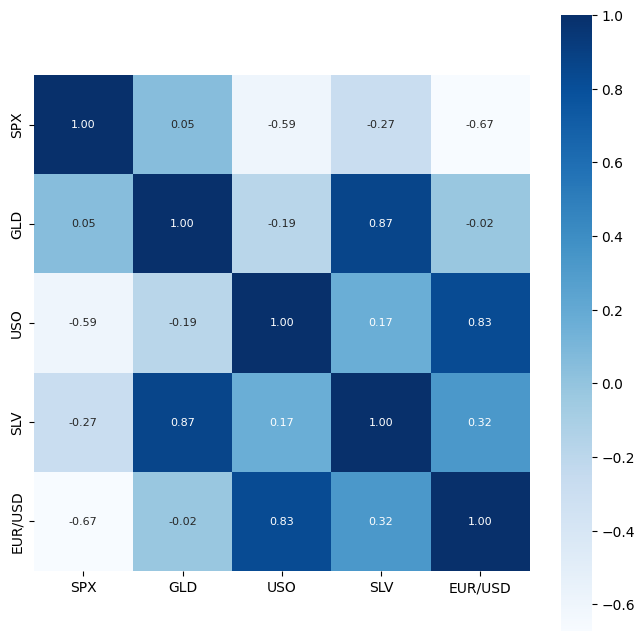

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation ,cbar=True ,square=True ,fmt='.2f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [ ]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [ ]:
print(correlation['GLD'].sort_values(ascending=False),'\n')

GLD        1.000000
SLV        0.866632
SPX        0.049345
EUR/USD   -0.024375
USO       -0.186360
Name: GLD, dtype: float64 



As per above corelation result, Silver is heavily corelated with the gold

<ipython-input-43-8a848ac6d50c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color='brown')


<Axes: xlabel='GLD', ylabel='Density'>

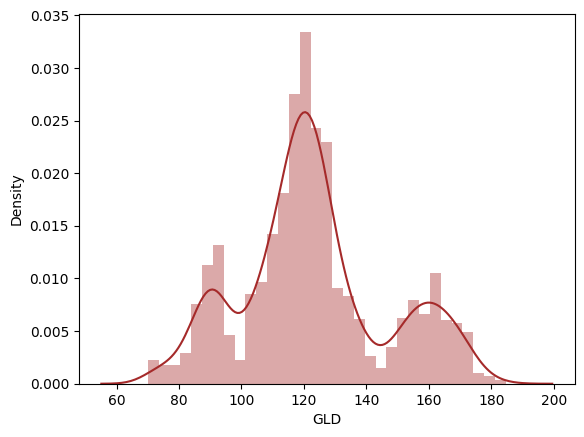

In [ ]:
#Checking the distribution of Gold Price
sns.distplot(df['GLD'],color='brown')

**Feature Engineering**

In [ ]:
#Dropping date and Gold column and doing Train Test split
X=df.drop(['Date','GLD'],axis=1)
Y=df['GLD']

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting Dataset

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
len(x_train)

1832

In [ ]:
len(x_test)

458

In [ ]:
x_train

,SPX,USO,SLV,EUR/USD
476,1138.500000,39.790001,16.889999,1.361693
1958,2202.939941,10.630000,15.800000,1.063886
248,700.820007,24.480000,12.770000,1.256408
2231,2656.000000,11.890000,15.570000,1.225280
1325,1838.880005,33.040001,19.420000,1.366998
...,...,...,...,...
1071,1409.150024,32.320000,32.980000,1.287515
433,1132.989990,40.270000,17.230000,1.442398
674,1286.119995,38.610001,27.389999,1.357276
1099,1461.890015,33.919998,29.180000,1.306745


Model Training :Random Forest Regressor

In [ ]:
regressor_model=RandomForestRegressor(n_estimators=100)



In [ ]:
#Training the model
regressor_model.fit(x_train,y_train)




RandomForestRegressor()

Model Evaluation

In [ ]:
#Prediction on Test data
test_data_pred=regressor_model.predict(x_test)

In [ ]:
#Accuracy score of model
regressor_model.score(x_test,y_test)

0.9890317783783712

In [ ]:
print(test_data_pred)

[168.56529941  82.19329972 116.04429986 127.69540067 120.71670151
 154.8612982  150.36979825 126.16930014 117.53599871 125.98950075
 116.5624009  171.92580141 142.0363982  167.78039823 115.16740023
 117.61540037 139.12630358 170.46920081 159.2460026  158.86709951
 155.09989997 125.38960047 176.04189981 157.41320331 125.22360048
  93.85469979  77.04110045 120.85399995 119.0561994  167.55389965
  88.32470056 125.35660011  91.22830094 117.69050019 121.15459915
 136.66070089 115.38150141 114.69260093 149.79779999 107.20970103
 104.36720242  87.08479771 126.49810049 117.94139988 152.61539869
 119.51320004 108.31049964 108.10399862  93.15430076 127.07229802
  75.12560046 113.5399989  121.30559994 111.34949904 118.83999871
 120.24039968 159.26319913 168.41670102 147.22069638  86.02809854
  94.45470075  86.80149861  90.7068003  118.98300087 126.41530054
 127.71940013 169.90039988 122.28709929 117.48749881  98.77400031
 168.42950166 142.77419837 132.10340235 121.17180215 121.16329932
 119.79750

In [ ]:
#R square error to compare X predicted and actual values
error_score=metrics.r2_score(y_test,test_data_pred)
print("R squared error:" , error_score)


R squared error: 0.9889969648983389


Compare actual and predicted values using Plot

In [ ]:
Y_test=list(y_test)

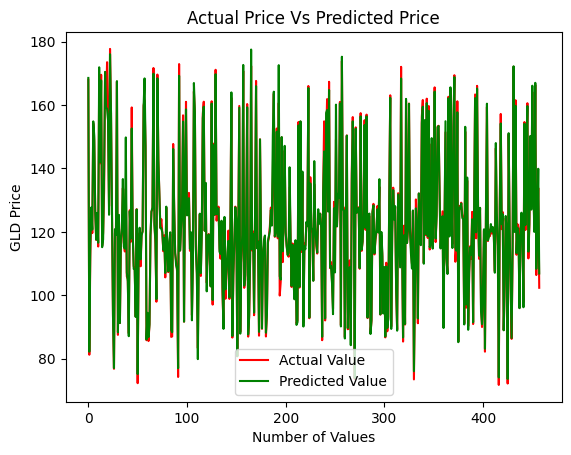

In [ ]:
plt.plot(Y_test,color='Red',label='Actual Value')
plt.plot(test_data_pred,color='Green',label='Predicted Value')
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

Model Prediction using XGBRegressor

In [ ]:
from xgboost import XGBRegressor
model_xgb=XGBRegressor(learning_rate=0.5,max_depth=3,n_estimator=200)




In [ ]:
#Finding Accuracy Score using XGBRegressor
model_xgb.fit(x_train,y_train)
model_xgb.score(x_test,y_test)

[00:19:14] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.



0.9820480798083607

In [ ]:
y_pred=model_xgb.predict(x_test)

In [ ]:
y_pred

array([168.62263 ,  80.59307 , 115.85037 , 127.2576  , 121.15055 ,
       155.26175 , 150.95514 , 126.17945 , 118.72211 , 127.167015,
       116.10037 , 171.95297 , 141.36809 , 165.07687 , 113.70683 ,
       118.22905 , 143.73479 , 169.13022 , 155.01312 , 161.28792 ,
       155.13303 , 124.03702 , 178.65161 , 155.33894 , 125.44054 ,
        97.0436  ,  78.94743 , 120.55446 , 119.42358 , 169.1889  ,
        86.80694 , 125.05137 ,  94.33913 , 117.92317 , 121.685135,
       141.55693 , 117.2706  , 115.8327  , 143.58603 , 108.57666 ,
       102.06441 ,  86.44486 , 126.276405, 115.75553 , 149.65114 ,
       120.29983 , 110.586716, 106.94644 ,  92.591774, 126.68837 ,
        72.61699 , 113.56118 , 119.18169 , 112.05618 , 120.245285,
       121.54334 , 156.48586 , 172.75974 , 146.78737 ,  86.53828 ,
        94.67445 ,  86.8147  ,  88.84949 , 116.9509  , 126.81164 ,
       127.50857 , 164.98816 , 121.95286 , 117.04007 ,  98.64427 ,
       168.91165 , 142.8934  , 135.89645 , 121.09903 , 122.637

In [ ]:
y_test

903     168.020004
129      81.230003
1787    112.320000
1913    127.589996
2048    119.620003
           ...    
923     166.380005
1693    106.379997
2054    122.239998
658     133.830002
376     102.360001
Name: GLD, Length: 458, dtype: float64